In [1]:
## import the dataset and do data preprocessing
## problem statement 
#develop a sentiment analysis model to classify the review as positive or negative. 
## preprocess the review text using the techniques like lower casing,removing stop words and lemmatization 
## use the training model accurately to predict the new or unseen reviews.
import pandas as pd

In [2]:
data = pd.read_csv("Reviews.csv")

In [3]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [4]:
# we can review the top 5 rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [6]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
data.info() ## to analyze data type of records,memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
data.isnull().sum()  ## preprocessing technique to check the null values  in the records

Review    0
Liked     0
dtype: int64

In [10]:
data.duplicated()  ## checking the duplicates 

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from wordcloud import WordCloud

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
combined_text=" ".join(data['Review']) ##combine all review text into one string

In [15]:
wordcloud=WordCloud(width=800,height=300,background_color="white").generate(combined_text)

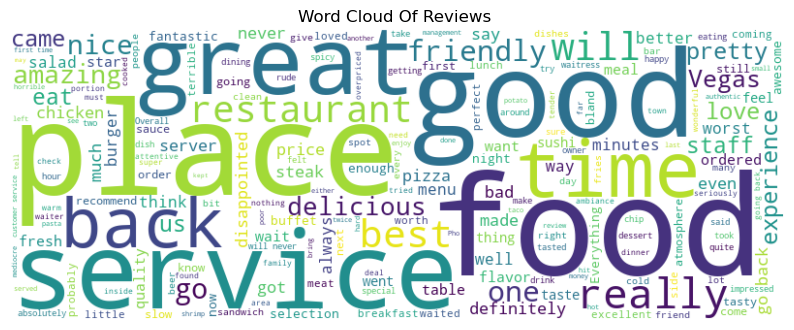

In [16]:
## plot the word clound
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Of Reviews ")
plt.show()

In [17]:
from collections import Counter

In [18]:
targeted_words=["good","amazing","great","service","place","friendly","love","vegus","food","really"]
all_words=" ".join(data['Review']).lower().split() ## flatten reviews into a single list of 
## count of target words
word_counts=Counter(all_words)
target_word_count={word:word_counts[word] for word in targeted_words}

In [19]:
print(target_word_count)


{'good': 61, 'amazing': 8, 'great': 57, 'service': 56, 'place': 77, 'friendly': 18, 'love': 18, 'vegus': 0, 'food': 91, 'really': 32}


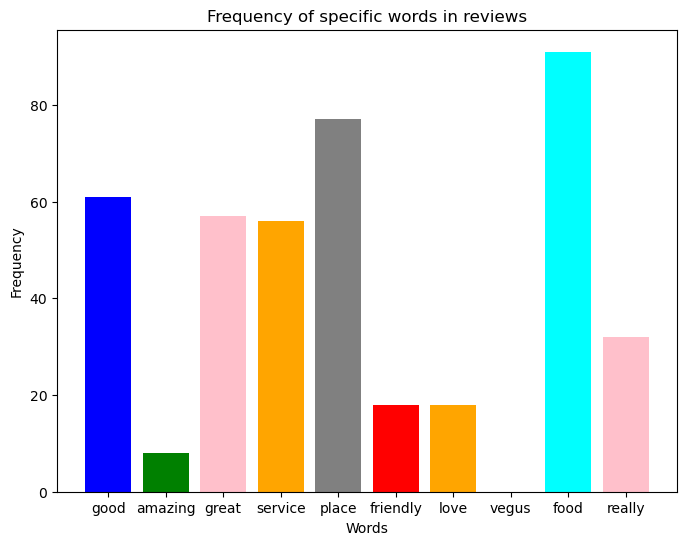

In [20]:
## plotting 
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(),color=['blue','green','pink','orange','grey','red','orange','purple','cyan','pink'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [21]:
##Text Preprocessing
## A technique

In [22]:
# 1. converting a dataset into lower case
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [23]:
## 2.tokenization
# tokenization is the process of breaking down a piece of text into smaller units,called tokens.
from nltk.tokenize  import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [26]:
data

,Review,Liked,Tokens
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te..."
996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]"
997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ..."
998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,..."


In [27]:
# 3.Removing stop words
## the words which are commonly used in english so that they do not provide much information to ml model
## WHICH HELP IN DIMENSIONALITY REDUCTION SUCH THAT THE MODEL CAN LEARN EASILY AND GIVES BETTER ACCURACY
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words=set(stopwords.words('english'))

In [29]:
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x)if word not in stop_words])

In [30]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [31]:
## 4.Stemming
## drive,driving,drove,driven, here machine only understands drive from all the words
## stemming,stop words all the methods are appllied on tokens
## A process of reducing words to its base or root form 
from nltk.stem import PorterStemmer

In [32]:
stemmer = PorterStemmer()

In [33]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

In [34]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [35]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [36]:
## 5.Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer

In [38]:
lemmatizer=WordNetLemmatizer()
data['Lemmatized']=data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word,pos="v") for word in word_tokenize(x)]))

In [39]:
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [40]:
## 6.remove the numbers 
import re
data['no_numbers']=data['Review'].apply(lambda x: re.sub(r'\d+',' ',x))

In [41]:
print(data['no_numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: no_numbers, Length: 1000, dtype: object


In [42]:
data['cleaned_text']=data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [43]:
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   no_numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [45]:
## Normalization 
import contractions 
data['Expanded']=data['Review'].apply(contractions.fix)
print(data['Expanded'])

ModuleNotFoundError: No module named 'contractions'

In [ ]:
pip install emoji

In [48]:
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [47]:
##Removing HTML tags
!pip install beautifulsoup4

In [49]:
from bs4 import BeautifulSoup

In [50]:
data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup (x,"html.parser").get_text())

C:\Users\saisu\AppData\Local\Temp\ipykernel_26092\1546485256.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x: BeautifulSoup (x,"html.parser").get_text())


In [52]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object
